Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Step 1: Minibatch Loss: 0.436857
Step 1000: Minibatch Loss: 0.143681
Step 2000: Minibatch Loss: 0.119139
Step 3000: Minibatch Loss: 0.101006
Step 4000: Minibatch Loss: 0.096611
Step 5000: Minibatch Loss: 0.093691
Step 6000: Minibatch Loss: 0.092775
Step 7000: Minibatch Loss: 0.082612
Step 8000: Minibatch Loss: 0.077735
Step 9000: Minibatch Loss: 0.076544
Step 10000: Minibatch Loss: 0.075089
Step 11000: Minibatch Loss: 0.074933
Step 12000: Minibatch Loss: 0.073076
Step 13000: Minibatch Loss: 0.071357
Step 14000: Minibatch Loss: 0.069459
Step 15000: Minibatch Loss: 0.070324
Step 16000: Minibatch Loss: 0.069809
Step 17000: Minibatch Loss: 0.066069
Step 18000: Minibatch Loss: 0.062599
Step 19000: Minibatch Loss: 0.063632
Step 20000: Minibatch Loss: 0.062759
Step 21000: Minibatch Loss: 0.062173
Step 2200

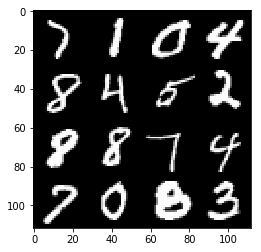

Reconstructed Images


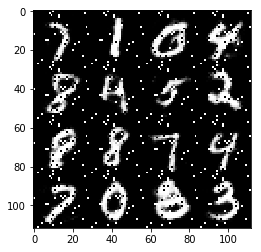

In [8]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256
num_hidden_2 = 128
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])


# Building the encoder
def encoder(x):    
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, tf.Variable(tf.random_normal([num_input, num_hidden_1]))),
                                    tf.Variable(tf.Variable(tf.random_normal([num_hidden_1])))))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2]))),
                                   tf.Variable(tf.random_normal([num_hidden_2]))))
    return layer_2


# Building the decoder
def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1]))),
                                   tf.Variable(tf.Variable(tf.random_normal([num_hidden_1])))))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, tf.Variable(tf.random_normal([num_hidden_1, num_input]))),
                                   tf.Variable(tf.random_normal([num_input]))))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    #?
    
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        #?
        batch_x, _ = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.train.next_batch(batch_size)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()